In [1]:
import olscheck
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
# instantiate OLS assumptions check:

ols_checker = olscheck.OlsCheck()

In [4]:
# generate data:

data_gen = olscheck.data_generator.LinearRegressionDataGenerator()

In [5]:
# fit OLS:

X = df[['X1','X2']]
y = df.y.values

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

df['pred'] = model.predict(X)

VIF Results:
  variables        vif
0        X1  15.351483
1        X2  15.351483
2     const   3.994739


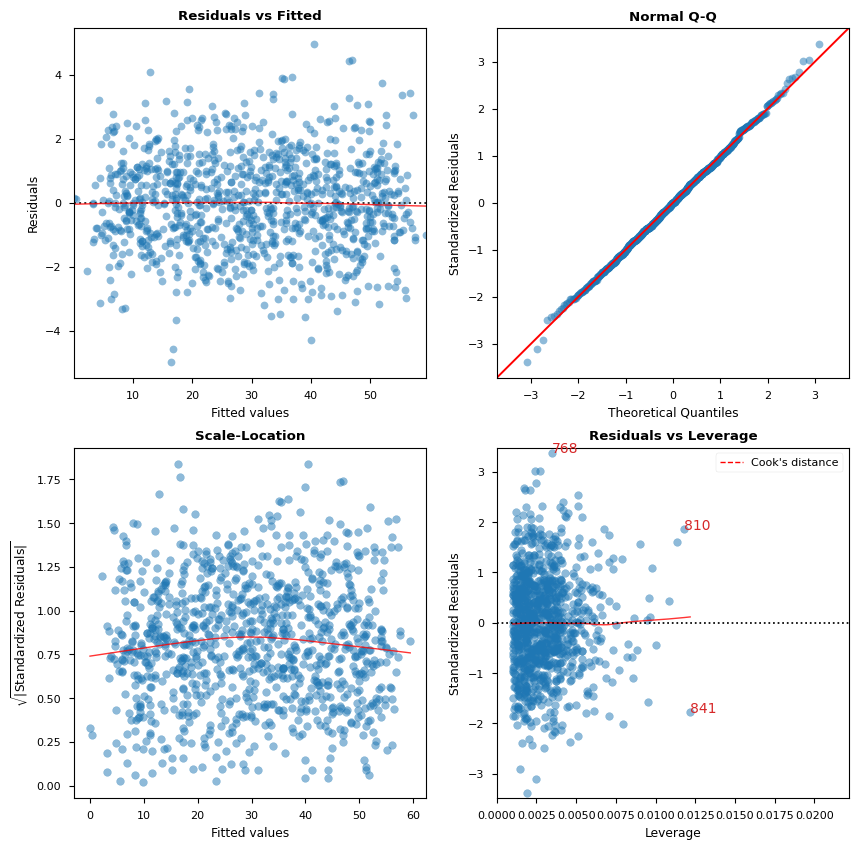

In [6]:
# Create plots:

ols_checker.ols_assumptions(df=df, 
                            y_true_col='y',
                            fittedvalues_col='pred',
                            features=['X1','X2'],
                            axis_lim=True,
                            constant=True)